In [12]:
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.naive_bayes import GaussianNB

# Conexão com o banco de dados PostgreSQL
conexao = psycopg2.connect(host="localhost", database="Projeto_Final", user="postgres", password="", port=5432)

# Consulta SQL para selecionar os dados do banco de dados
consulta_sql = """
SELECT cl."cliente", 
       c."IDCREDITO", 
       hc."HISTORICO", 
       p."PROFISSAO",
       f."FIADOR",
       i."INVESTIMENTOS",
       of."OUTROSFINANCIAMENTOS",
       c."Status"
FROM public."CLIENTES" cl
JOIN public."CREDITO" c ON cl."idcliente" = c."IDCREDITO"
JOIN public."HISTORICO_CREDITO" hc ON c."HistoricoCredito" = hc."IDHISTCRED"
JOIN public."PROFISSAO" p ON c."Profissao" = p."IDPROFISSAO"
JOIN public."FIADOR" f ON c."FiadorTerceiros" = f."IDFIADOR"
JOIN public."INVESTIMENTOS" i ON c."Investimentos" = i."IDINVESTIMENTOS"
JOIN public."OUTROSFINANC" of ON c."OutrosFinanciamentos" = of."IDOUTROSFINANC";
"""

# Carregar os dados do banco de dados para um DataFrame
df = pd.read_sql_query(consulta_sql, conexao)
df.shape

/var/folders/_k/58jdphbs5pj0tbmhzg3ccj5w0000gn/T/ipykernel_38900/161411547.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta_sql, conexao)


(241, 8)

In [13]:
previsores = df.iloc[:, 0:7].values
classe = df.iloc[:,7].values

In [14]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 4] = labelencoder4.fit_transform(previsores[:, 4])

labelencoder5 = LabelEncoder()
previsores[:, 5] = labelencoder5.fit_transform(previsores[:, 5])

labelencoder6 = LabelEncoder()
previsores[:, 6] = labelencoder6.fit_transform(previsores[:, 6])


In [15]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[107, 115, 2, 3, 2, 1, 2],
       [65, 76, 1, 0, 2, 2, 2],
       [37, 40, 2, 3, 2, 2, 2],
       [69, 79, 3, 2, 2, 4, 2],
       [106, 114, 1, 3, 2, 2, 1],
       [228, 238, 2, 2, 2, 0, 0],
       [156, 162, 1, 3, 2, 2, 2],
       [219, 229, 2, 3, 2, 2, 2],
       [152, 158, 4, 2, 2, 2, 0],
       [235, 245, 4, 2, 2, 1, 2],
       [96, 81, 2, 3, 2, 4, 2],
       [178, 186, 1, 3, 2, 2, 2],
       [78, 88, 2, 3, 2, 0, 2],
       [157, 163, 2, 3, 2, 1, 2],
       [186, 194, 2, 3, 2, 2, 2],
       [134, 140, 2, 2, 2, 2, 2],
       [194, 202, 2, 2, 2, 2, 2],
       [109, 117, 2, 0, 2, 4, 2],
       [222, 230, 2, 3, 2, 2, 0],
       [8, 11, 2, 3, 2, 2, 2],
       [101, 107, 4, 0, 2, 2, 0],
       [180, 188, 1, 1, 2, 2, 2],
       [83, 94, 1, 3, 1, 4, 2],
       [120, 128, 2, 3, 2, 2, 2],
       [5, 7, 2, 3, 2, 1, 2],
       [22, 25, 1, 3, 2, 4, 2],
       [200, 208, 1, 3, 2, 2, 2],
       [97, 103, 0, 3, 2, 2, 2],
       [12, 15, 2, 3, 2, 2, 2],
       [168, 173, 0, 0, 2, 2, 2],
    

In [16]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [17]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [18]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 4, 14],
       [ 7, 48]])

In [8]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.7123287671232876

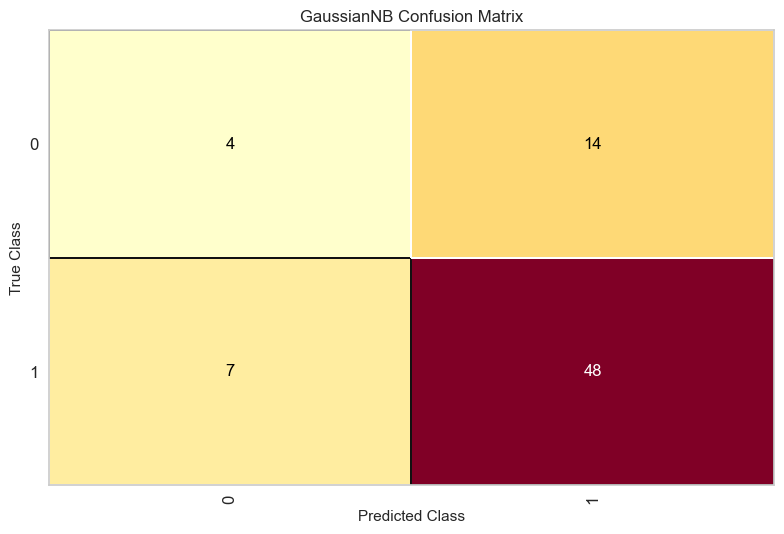

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [9]:
# Visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()